In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
activities_csv = pd.read_csv('ac_activities_torben_clean.csv')
activities_csv.head()

,id,type,start_date_local,x_start_h,name,x_min,x_mi,x_min/mi,x_mph,x_max_mph,...,athlete_count,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url
0,868156484,Run,15.01.2017 06:17:41,6.3,Morning Run,248.2,26.510,9.36,6.41,9.17,...,29,NaN,42663.3,14892,33.176906,-117.335854,(GMT-08:00) America/Los_Angeles,2017-01-15,0.51,https://www.strava.com/activities/868156484
1,868156415,Run,17.01.2017 18:50:18,18.8,Evening Run,16.1,2.023,7.95,7.55,11.41,...,30,NaN,3256.2,1300,32.720301,-117.150205,(GMT-08:00) America/Los_Angeles,2017-01-17,NaN,https://www.strava.com/activities/868156415
2,868156459,Run,19.01.2017 06:35:12,6.6,Morning Run,87.0,10.091,8.62,6.96,9.62,...,1,NaN,16240.6,5271,32.853794,-116.960111,(GMT-08:00) America/Los_Angeles,2017-01-19,0.85,https://www.strava.com/activities/868156459
3,868156435,Run,21.01.2017 07:17:12,7.3,Morning Run,88.8,11.518,7.71,7.78,9.17,...,2,NaN,18535.6,5804,32.758368,-117.242017,(GMT-08:00) America/Los_Angeles,2017-01-21,0.16,https://www.strava.com/activities/868156435
4,868156458,Run,22.01.2017 16:50:51,16.8,Afternoon Run,89.6,10.066,8.90,6.74,8.50,...,1,NaN,16199.8,5658,32.853570,-116.960471,(GMT-08:00) America/Los_Angeles,2017-01-22,0.48,https://www.strava.com/activities/868156458


In [3]:
#activities_csv.dtypes

In [4]:
activities = activities_csv[["type", "start_date_local", "x_start_h", "name", "x_min", "x_mi", "x_min/mi", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count", "distance", "elapsed_time"]].copy()
activities.head()

,type,start_date_local,x_start_h,name,x_min,x_mi,x_min/mi,total_elevation_gain,average_cadence,elev_low,elev_high,athlete_count,distance,elapsed_time
0,Run,15.01.2017 06:17:41,6.3,Morning Run,248.2,26.510,9.36,217.6,80.8,-7.1,97.1,29,42663.3,14892
1,Run,17.01.2017 18:50:18,18.8,Evening Run,16.1,2.023,7.95,0.0,84.5,40.7,44.6,30,3256.2,1300
2,Run,19.01.2017 06:35:12,6.6,Morning Run,87.0,10.091,8.62,137.6,84.0,106.0,201.5,1,16240.6,5271
3,Run,21.01.2017 07:17:12,7.3,Morning Run,88.8,11.518,7.71,29.5,84.9,1.3,20.1,2,18535.6,5804
4,Run,22.01.2017 16:50:51,16.8,Afternoon Run,89.6,10.066,8.90,77.0,83.0,96.0,137.9,1,16199.8,5658


In [5]:
activities = activities.dropna(how="any")
activities["start_date_local"] = activities["start_date_local"].apply(pd.to_datetime,errors="coerce")
activities.dtypes

type                            object
start_date_local        datetime64[ns]
x_start_h                      float64
name                            object
x_min                          float64
x_mi                           float64
x_min/mi                       float64
total_elevation_gain           float64
average_cadence                float64
elev_low                       float64
elev_high                      float64
athlete_count                    int64
distance                       float64
elapsed_time                     int64
dtype: object

In [6]:
#X = activities[["x_min", "x_mi", "name"]]
X = activities[["type", "x_start_h", "name", "x_min", "x_mi", "total_elevation_gain", "average_cadence", "elev_low", "elev_high", "athlete_count", "distance", "elapsed_time"]]
y = activities["x_min/mi"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (435, 12) (435, 1)


In [7]:
X.head()

,type,x_start_h,name,x_min,x_mi,total_elevation_gain,average_cadence,elev_low,elev_high,athlete_count,distance,elapsed_time
0,Run,6.3,Morning Run,248.2,26.510,217.6,80.8,-7.1,97.1,29,42663.3,14892
1,Run,18.8,Evening Run,16.1,2.023,0.0,84.5,40.7,44.6,30,3256.2,1300
2,Run,6.6,Morning Run,87.0,10.091,137.6,84.0,106.0,201.5,1,16240.6,5271
3,Run,7.3,Morning Run,88.8,11.518,29.5,84.9,1.3,20.1,2,18535.6,5804
4,Run,16.8,Afternoon Run,89.6,10.066,77.0,83.0,96.0,137.9,1,16199.8,5658


In [8]:
#print(y)

In [9]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,x_start_h,x_min,x_mi,total_elevation_gain,average_cadence,elev_low,elev_high,athlete_count,distance,elapsed_time,type_Run,name_Afternoon Run,name_Evening Run,name_Lunch Run,name_Morning Run,name_Night Run
0,6.3,248.2,26.510,217.6,80.8,-7.1,97.1,29,42663.3,14892,1,0,0,0,1,0
1,18.8,16.1,2.023,0.0,84.5,40.7,44.6,30,3256.2,1300,1,0,1,0,0,0
2,6.6,87.0,10.091,137.6,84.0,106.0,201.5,1,16240.6,5271,1,0,0,0,1,0
3,7.3,88.8,11.518,29.5,84.9,1.3,20.1,2,18535.6,5804,1,0,0,0,1,0
4,16.8,89.6,10.066,77.0,83.0,96.0,137.9,1,16199.8,5658,1,1,0,0,0,0


In [10]:
data_binary_encoded.dtypes

x_start_h               float64
x_min                   float64
x_mi                    float64
total_elevation_gain    float64
average_cadence         float64
elev_low                float64
elev_high               float64
athlete_count             int64
distance                float64
elapsed_time              int64
type_Run                  uint8
name_Afternoon Run        uint8
name_Evening Run          uint8
name_Lunch Run            uint8
name_Morning Run          uint8
name_Night Run            uint8
dtype: object

In [11]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,x_start_h,x_min,x_mi,total_elevation_gain,average_cadence,elev_low,elev_high,athlete_count,distance,elapsed_time,type_Run,name_Afternoon Run,name_Evening Run,name_Lunch Run,name_Morning Run,name_Night Run
313,7.4,145.3,14.959,115.8,83.9,2.0,28.0,1,24074.2,10329,1,0,0,0,1,0
3,7.3,88.8,11.518,29.5,84.9,1.3,20.1,2,18535.6,5804,1,0,0,0,1,0
19,7.6,39.8,4.137,57.3,84.0,109.9,161.4,1,6658.6,2390,1,0,0,0,1,0
210,19.3,25.6,3.385,7.5,87.9,40.7,46.0,1,5447.8,1534,1,0,1,0,0,0
61,19.3,67.6,7.425,0.0,83.6,110.0,117.5,1,11949.4,4142,1,0,1,0,0,0


In [12]:
#StandardScaler

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

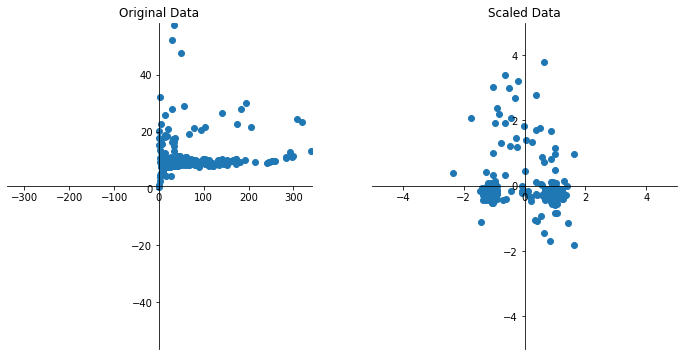

In [14]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["x_min"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-5, 5)
axes2.set_ylim(-5, 5)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["x_min"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [15]:
plt.show()

In [16]:
#Step 1) Convert Categorcial data to numbers using Integer or Binary Encoding

X = pd.get_dummies(activities[["x_min", "x_mi", "name"]])
y = activities["x_min/mi"].values.reshape(-1, 1)
X.head()

,x_min,x_mi,name_Afternoon Run,name_Evening Run,name_Lunch Run,name_Morning Run,name_Night Run
0,248.2,26.510,0,0,0,1,0
1,16.1,2.023,0,1,0,0,0
2,87.0,10.091,0,0,0,1,0
3,88.8,11.518,0,0,0,1,0
4,89.6,10.066,1,0,0,0,0


In [17]:
#Step 2) Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
#Step 3) Scale or Normalize your data.  Use StandardScaler if you don't
#know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

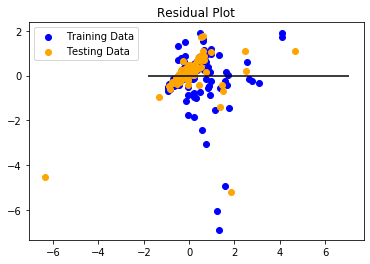

In [19]:
#Step 4) Fit the Model to the scaled training data and make preditions
#using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [20]:
#Step 5) Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6557420709794304, R2: 0.30536189059667707
